In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC

In [2]:
Train = pd.read_csv('SalaryData_Train.csv')
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
Test = pd.read_csv('SalaryData_Test.csv')
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7688 non-null   int64  
 1   workclass      7688 non-null   object 
 2   education      7688 non-null   object 
 3   educationno    7688 non-null   int64  
 4   maritalstatus  7688 non-null   object 
 5   occupation     7688 non-null   object 
 6   relationship   7688 non-null   object 
 7   race           7688 non-null   object 
 8   sex            7687 non-null   object 
 9   capitalgain    7687 non-null   float64
 10  capitalloss    7687 non-null   float64
 11  hoursperweek   7687 non-null   float64
 12  native         7687 non-null   object 
 13  Salary         7687 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 841.0+ KB


In [6]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [7]:
Test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7688.0,38.593913,13.318555,17.0,28.0,37.0,47.0,90.0
educationno,7688.0,10.097294,2.561618,1.0,9.0,10.0,13.0,16.0
capitalgain,7687.0,1190.283466,8146.926737,0.0,0.0,0.0,0.0,99999.0
capitalloss,7687.0,88.224665,405.460430,0.0,0.0,0.0,0.0,3175.0
hoursperweek,7687.0,41.024717,12.041040,1.0,40.0,40.0,45.0,99.0


C:\Users\Anup0\AppData\Local\Temp\ipykernel_9700\2207452391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


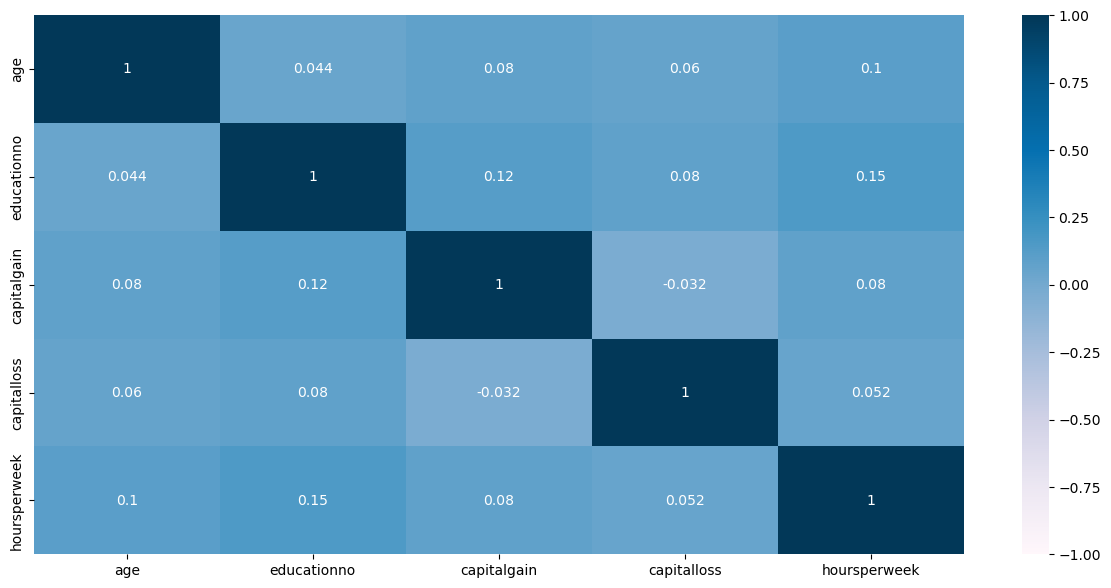

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(Train.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_9700\2767063494.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Test.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')


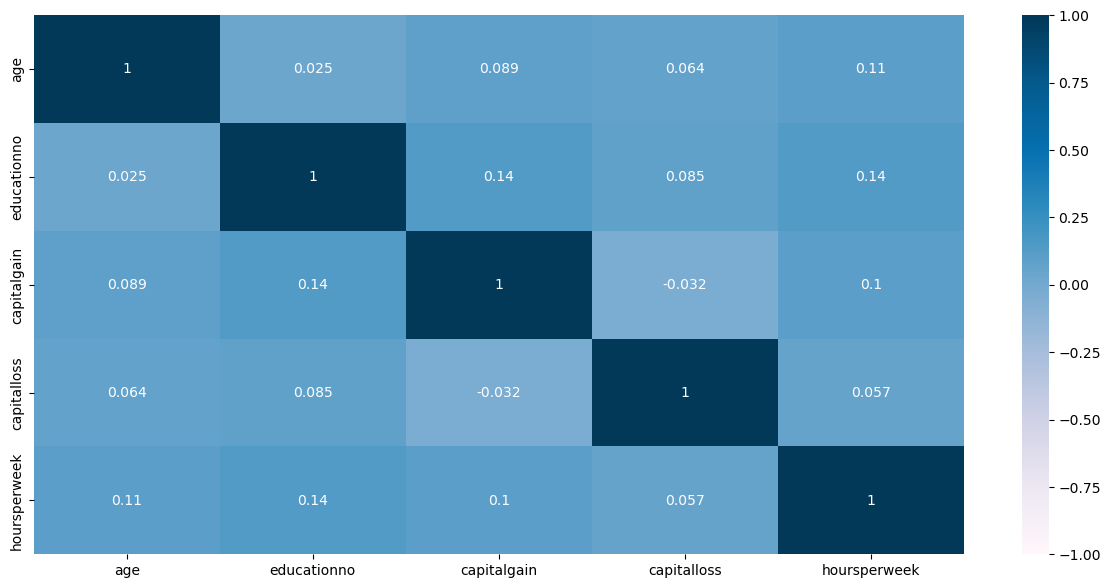

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(Test.corr(),vmax=1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

In [10]:
Train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

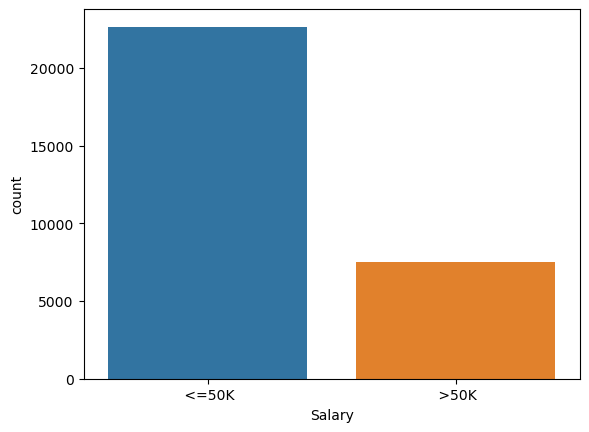

In [11]:
# Checking for class imbalance:
sns.countplot(x = 'Salary',data = Train)
plt.show()

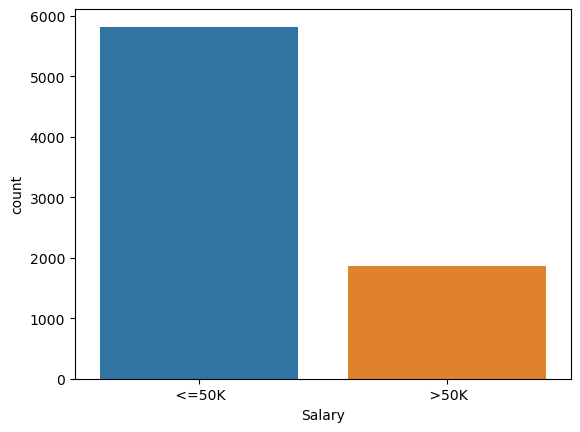

In [12]:
# Checking for class imbalance:
sns.countplot(x = 'Salary',data = Test)
plt.show()

In [13]:
Train.duplicated().sum()

3258

In [14]:
Train[Train.duplicated()].head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [15]:
Train.drop_duplicates(inplace=True)
Train.reset_index(inplace=True,drop=True)
Train.duplicated().sum()

0

In [16]:
Test.duplicated().sum()

275

In [17]:
Test.drop_duplicates(inplace=True)
Test.reset_index(inplace=True,drop=True)
Test.duplicated().sum()

0

In [18]:
Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [19]:
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [21]:
Test.dropna(inplace=True)
Test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
# Let's use cross tab to check distribution:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


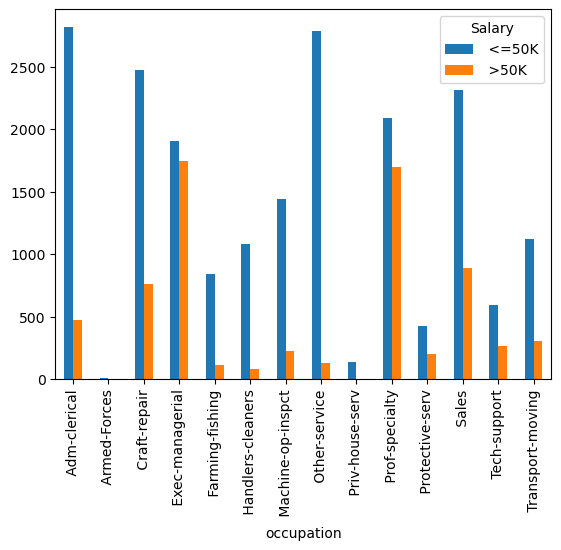

In [23]:
pd.crosstab(Train['occupation'],Train['Salary']).plot(kind='bar')
plt.show()

In [24]:
pd.crosstab(Train['relationship'],Train['Salary'])

Salary,<=50K,>50K
relationship,,
Husband,5723,5086
Not-in-family,6302,813
Other-relative,837,35
Own-child,3591,64
Unmarried,2873,213
Wife,697,669


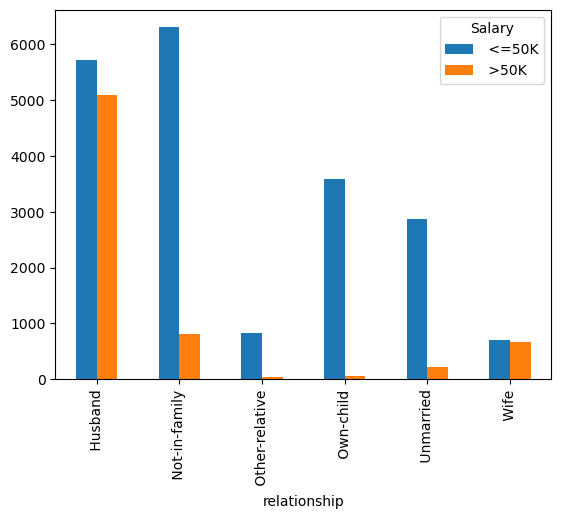

In [25]:
pd.crosstab(Train['relationship'],Train['Salary']).plot(kind='bar')
plt.show()

In [26]:
pd.crosstab(Train['education'],Train['Salary'])

Salary,<=50K,>50K
education,,
10th,714,56
11th,882,59
12th,329,29
1st-4th,143,6
5th-6th,271,12
7th-8th,506,35
9th,424,25
Assoc-acdm,739,255
Assoc-voc,923,333


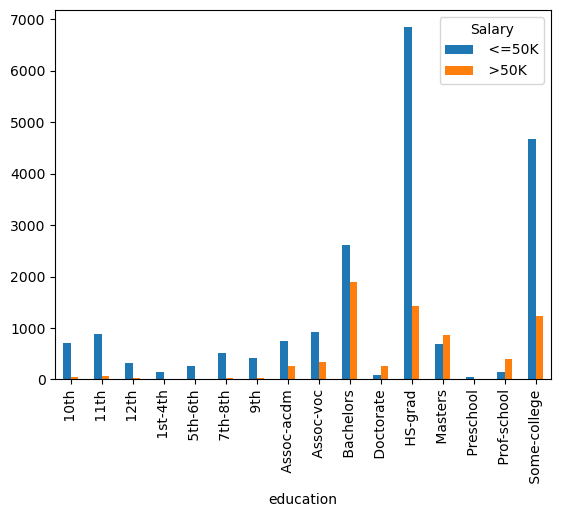

In [27]:
pd.crosstab(Train['education'],Train['Salary']).plot(kind='bar')
plt.show()

In [28]:
pd.crosstab(Train['race'],Train['Salary'])

Salary,<=50K,>50K
race,,
Amer-Indian-Eskimo,252,34
Asian-Pac-Islander,646,248
Black,2371,363
Other,210,21
White,16544,6214


In [29]:
pd.crosstab(Train['sex'],Train['Salary'])

Salary,<=50K,>50K
sex,,
Female,7857,1085
Male,12166,5795


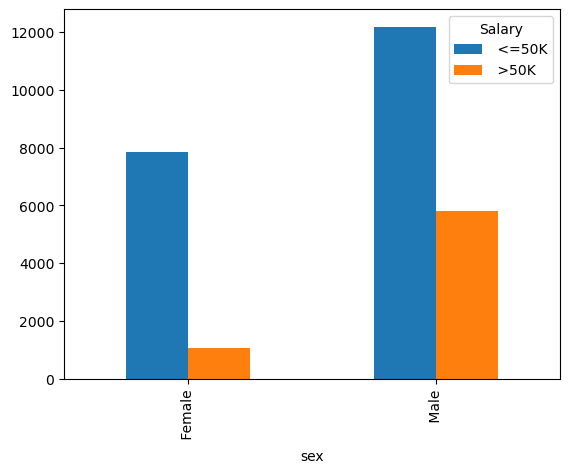

In [30]:
pd.crosstab(Train['sex'],Train['Salary']).plot(kind='bar')
plt.show()

In [31]:
pd.crosstab(Train['native'],Train['Salary'])

Salary,<=50K,>50K
native,,
Cambodia,11,7
Canada,71,36
China,48,20
Columbia,54,2
Cuba,67,25
Dominican-Republic,65,2
Ecuador,23,4
El-Salvador,91,9
England,56,30


In [32]:
Train.drop('educationno',axis=1,inplace=True)
Test.drop('educationno',axis=1,inplace=True)

In [33]:
Obj_Cols = list(Train.describe(include=['object']).columns)

In [34]:
LE = LabelEncoder()
for col in Obj_Cols:
    Train[col] = LE.fit_transform(Train[col])
    Test[col] = LE.fit_transform(Test[col])
Train.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0


In [35]:
# Splitting data into features and target also test & train df:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]
y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

In [36]:
# Scaling the data as we are going to perform distance based calculations:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

#### Building SVM model:

In [37]:
svm_clf = SVC()
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.8282719399323496
Accuracy Score for Test :  0.8244738262277388 

Confusion_matrix for Train :  
 [[18896  3493]
 [ 1127  3387]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     22389
           1       0.49      0.75      0.59      4514

    accuracy                           0.83     26903
   macro avg       0.72      0.80      0.74     26903
weighted avg       0.87      0.83      0.84     26903
 

Confusion_matrix for Test :  
 [[5265  973]
 [ 328  846]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      6238
           1       0.47      0.72      0.57      1174

    accuracy                           0.82      7412
   macro avg       0.70      0.78      0.73      7412
weighted avg       0.87      0.82      0.84      7412
 



In [38]:
svm_clf = SVC(kernel='sigmoid')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7089172211277552
Accuracy Score for Test :  0.7104695089044792 

Confusion_matrix for Train :  
 [[16147  3955]
 [ 3876  2925]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.81      0.80      0.80     20102
           1       0.43      0.43      0.43      6801

    accuracy                           0.71     26903
   macro avg       0.62      0.62      0.62     26903
weighted avg       0.71      0.71      0.71     26903
 

Confusion_matrix for Test :  
 [[4505 1058]
 [1088  761]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      5563
           1       0.42      0.41      0.41      1849

    accuracy                           0.71      7412
   macro avg       0.61      0.61      0.61      7412
weighted avg       0.71      0.71      0.71      7412
 



In [39]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.7900605880385088
Accuracy Score for Test :  0.7945223961144091 

Confusion_matrix for Train :  
 [[19032  4657]
 [  991  2223]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.95      0.80      0.87     23689
           1       0.32      0.69      0.44      3214

    accuracy                           0.79     26903
   macro avg       0.64      0.75      0.66     26903
weighted avg       0.88      0.79      0.82     26903
 

Confusion_matrix for Test :  
 [[5332 1262]
 [ 261  557]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.95      0.81      0.88      6594
           1       0.31      0.68      0.42       818

    accuracy                           0.79      7412
   macro avg       0.63      0.74      0.65      7412
weighted avg       0.88      0.79      0.83      7412
 



In [40]:
svm_clf = SVC(kernel='rbf')
svm_model = svm_clf.fit(X_train,y_train)
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

print("Accuracy Score for Train : ",accuracy_score(y_train_pred,y_train))
print("Accuracy Score for Test : ",accuracy_score(y_test_pred,y_test),'\n')

print("Confusion_matrix for Train : ",'\n',confusion_matrix(y_train_pred,y_train),'\n')
print("Classification_report for Train : ",'\n',classification_report(y_train_pred,y_train),'\n')


print("Confusion_matrix for Test : ",'\n',confusion_matrix(y_test_pred,y_test),'\n')
print("Classification_report for Test : ",'\n',classification_report(y_test_pred,y_test),'\n')

Accuracy Score for Train :  0.8282719399323496
Accuracy Score for Test :  0.8244738262277388 

Confusion_matrix for Train :  
 [[18896  3493]
 [ 1127  3387]] 

Classification_report for Train :  
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     22389
           1       0.49      0.75      0.59      4514

    accuracy                           0.83     26903
   macro avg       0.72      0.80      0.74     26903
weighted avg       0.87      0.83      0.84     26903
 

Confusion_matrix for Test :  
 [[5265  973]
 [ 328  846]] 

Classification_report for Test :  
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      6238
           1       0.47      0.72      0.57      1174

    accuracy                           0.82      7412
   macro avg       0.70      0.78      0.73      7412
weighted avg       0.87      0.82      0.84      7412
 



In [41]:
#Observation: We are getting a good fit model with kernel='rbf'